In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Veri artırma için transformları tanımlayalım
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Tüm resimleri aynı boyuta getirme
    transforms.RandomHorizontalFlip(),  # Rastgele yatay çevirme
    transforms.ToTensor(),  # Resimleri tensor formata dönüştürme
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalizasyon
])

# Veri setini tek bir klasörden yükleyelim
dataset = datasets.ImageFolder(root='dataset', transform=transform)




In [2]:
# Veri setini eğitim, doğrulama ve test olarak ayırabiliriz
train_size = int(0.7 * len(dataset))
val_size = int(0.15 * len(dataset))
test_size = len(dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])



In [3]:
# DataLoader ile veri setini mini-batch'ler halinde yükleyelim
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [4]:
# Eğitim veri seti için veri artırma tekniklerini ekledik
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomCrop(224, padding=4),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])



In [5]:
# Eğitim veri setini yeniden tanımlıyoruz
train_dataset = datasets.ImageFolder(root='dataset', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7589979].


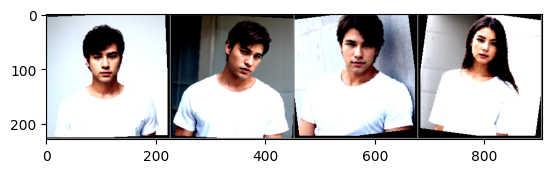

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# DataLoader'dan bir batch alalım
data_iter = iter(train_loader)
images, labels = next(data_iter)  # .next() yerine next(data_iter) kullanıyoruz

# Görüntüleri gösterme
def imshow(img):
    img = img / 2 + 0.5  # Normalizasyonu geri alma
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# İlk 4 görüntüyü göster
imshow(torchvision.utils.make_grid(images[:4]))


In [7]:
"""import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # 1. Konvolüsyon katmanı
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 2. Konvolüsyon katmanı
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # 3. Konvolüsyon katmanı
        self.pool = nn.MaxPool2d(2, 2)  # Max pooling katmanı
        self.fc1 = nn.Linear(64 * 28 * 28, 512)  # Tam bağlantılı katman
        self.fc2 = nn.Linear(512, 2)  # Çıktı katmanı (2 sınıf: kadın, erkek)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 64 * 28 * 28)  # Veriyi düzleştiriyoruz
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modeli tanımlayalım
model = SimpleCNN()

# Kayıp fonksiyonunu ve optimizasyon yöntemini tanımlayalım
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)"""


'import torch.nn as nn\nimport torch.nn.functional as F\n\nclass SimpleCNN(nn.Module):\n    def __init__(self):\n        super(SimpleCNN, self).__init__()\n        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)  # 1. Konvolüsyon katmanı\n        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)  # 2. Konvolüsyon katmanı\n        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)  # 3. Konvolüsyon katmanı\n        self.pool = nn.MaxPool2d(2, 2)  # Max pooling katmanı\n        self.fc1 = nn.Linear(64 * 28 * 28, 512)  # Tam bağlantılı katman\n        self.fc2 = nn.Linear(512, 2)  # Çıktı katmanı (2 sınıf: kadın, erkek)\n\n    def forward(self, x):\n        x = self.pool(F.relu(self.conv1(x)))\n        x = self.pool(F.relu(self.conv2(x)))\n        x = self.pool(F.relu(self.conv3(x)))\n        x = x.view(-1, 64 * 28 * 28)  # Veriyi düzleştiriyoruz\n        x = F.relu(self.fc1(x))\n        x = self.fc2(x)\n        return x\n\n# Modeli tanımlayalım\nmodel = SimpleCNN()\n\n# Kayıp fonksiyonunu ve optimizasy

In [8]:
import torch.nn as nn
import torchvision.models as models

# Önceden eğitilmiş ResNet18 modelini yükleyelim
model = models.resnet18(pretrained=True)

# Son katmanı cinsiyet sınıflandırması için yeniden tanımlıyoruz
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

# Kayıp fonksiyonunu ve optimizasyon yöntemini tanımlayalım
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


c:\Users\ilayd\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\ilayd\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model = model.to(device)

num_epochs = 10  # Eğitim yapacağımız epoch sayısı

from tqdm import tqdm

for epoch in range(num_epochs):
    model.train()  # Modeli eğitim moduna al
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Optimize ediciyi sıfırla
        optimizer.zero_grad()

        # İleri geçiş
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Geri geçiş ve optimize etme
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Batch loss: {loss.item()}")
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")
    print(f"Total batches: {len(train_loader)}")

print("Eğitim Tamamlandı!")



Using device: cpu


100%|██████████| 63/63 [06:15<00:00,  5.97s/it]


Batch loss: 0.13563936948776245
Epoch 1/10, Loss: 0.06822429204984228
Total batches: 63


100%|██████████| 63/63 [06:05<00:00,  5.80s/it]


Batch loss: 0.0008426536805927753
Epoch 2/10, Loss: 0.015531068307436294
Total batches: 63


100%|██████████| 63/63 [06:02<00:00,  5.76s/it]


Batch loss: 0.00011853045725729316
Epoch 3/10, Loss: 0.018563336754422857
Total batches: 63


100%|██████████| 63/63 [06:03<00:00,  5.77s/it]


Batch loss: 0.12124636769294739
Epoch 4/10, Loss: 0.021324008885130752
Total batches: 63


100%|██████████| 63/63 [06:06<00:00,  5.82s/it]


Batch loss: 0.009629846550524235
Epoch 5/10, Loss: 0.022574892065243886
Total batches: 63


100%|██████████| 63/63 [07:02<00:00,  6.71s/it]


Batch loss: 0.0014166939072310925
Epoch 6/10, Loss: 0.013495040734322549
Total batches: 63


100%|██████████| 63/63 [06:52<00:00,  6.54s/it]


Batch loss: 6.022352317813784e-05
Epoch 7/10, Loss: 0.015155114552250043
Total batches: 63


100%|██████████| 63/63 [07:16<00:00,  6.93s/it]


Batch loss: 4.836479274672456e-05
Epoch 8/10, Loss: 0.010895689379067913
Total batches: 63


100%|██████████| 63/63 [07:03<00:00,  6.71s/it]


Batch loss: 0.0006337001686915755
Epoch 9/10, Loss: 0.004658085707462074
Total batches: 63


100%|██████████| 63/63 [07:32<00:00,  7.18s/it]

Batch loss: 0.16587196290493011
Epoch 10/10, Loss: 0.016037060310375797
Total batches: 63
Eğitim Tamamlandı!


In [ ]:
#with tf.device('/cpu:0'):

In [11]:
model.eval()  # Modeli değerlendirme moduna al
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to('cpu'), labels.to('cpu')
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Doğruluğu: {100 * correct / total}%")

Test Doğruluğu: 99.66666666666667%
